## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Interactively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- The most important parts of this tutorial from matrices to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy. 
<br>
<br>**Content:**
1. [Basics of Pytorch](#1)
    - Matrices
    - Math
    - Variable
1. [Linear Regression](#2)
1. [Logistic Regression](#3)
1. [Artificial Neural Network (ANN)](#4)
1. [Concolutional Neural Network (CNN)](#5)
1. Recurrent Neural Network (RNN)
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
1. Long-Short Term Memory (LSTM)
    - https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

In [2]:
#I'LL START BY IMPORTING THE PACKAGES
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


<a id="1"></a> <br>
## Basics of Pytorch
### Matrices
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3x3 tensor.
- Lets look at array example with numpy that we already know.
    - We create numpy array with np.numpy() method
    - Type(): type of the array. In this example it is numpy
    - np.shape(): shape of the array. Row x Column

In [3]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [4]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7d79dae43708>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [5]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.36057306 0.77214209 0.07358186]
 [0.04901116 0.79931429 0.45341141]]

tensor([[0.5160, 0.1070, 0.2708],
        [0.3711, 0.9825, 0.9837]])


- Even if when I use pytorch for neural networks, I feel better if I use numpy. Therefore, usually convert result of neural network that is tensor to numpy array to visualize or examine.
- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy(): from numpy to tensor
    - numpy(): from tensor to numpy

In [6]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.57147397 0.41948755]
 [0.4629168  0.06320744]]

tensor([[0.5715, 0.4195],
        [0.4629, 0.0632]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.57147397 0.41948755]
 [0.4629168  0.06320744]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b 
- Element wise division: torch.div(a,b) = a / b 
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [7]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables
- It accumulates gradients. 
- We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation. 
- Deep learning tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- Difference between variables and tensor is variable accumulates gradients.
- We can make math operations with variables, too.
- In order to make backward propagation we need variables

In [8]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var


tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [9]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
### Linear Regression
- Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.
- Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

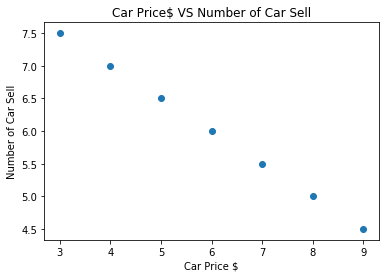

In [10]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
- **Steps of Linear Regression**
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction
- Lets implement it with Pytorch

epoch 0, loss 8.580355644226074
epoch 50, loss 5.406609058380127
epoch 100, loss 3.653472661972046
epoch 150, loss 2.4688048362731934
epoch 200, loss 1.6682745218276978
epoch 250, loss 1.1273223161697388
epoch 300, loss 0.7617780566215515
epoch 350, loss 0.5147655010223389
epoch 400, loss 0.3478485643863678
epoch 450, loss 0.2350553572177887
epoch 500, loss 0.1588369458913803
epoch 550, loss 0.10733287036418915
epoch 600, loss 0.07252933830022812
epoch 650, loss 0.04901134967803955
epoch 700, loss 0.03311903402209282
epoch 750, loss 0.022379746660590172
epoch 800, loss 0.015123112127184868
epoch 850, loss 0.010219193994998932
epoch 900, loss 0.0069054048508405685
epoch 950, loss 0.004666292108595371
epoch 1000, loss 0.003153228899464011


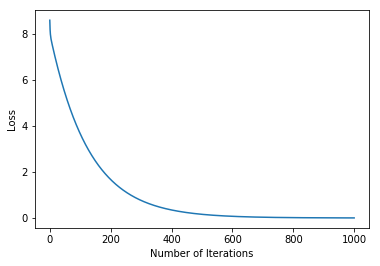

In [11]:
# Linear Regression with Pytorch

# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn # A module in PyTorch for creating and training neural networks. It provides various utilities like loss functions and layers.
import warnings
warnings.filterwarnings("ignore")


# create class
class LinearRegression(nn.Module): #This defines a custom class that inherits from nn.Module, which is the base class for all neural network modules in PyTorch.
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__() #This calls the constructor of the parent class (nn.Module) to initialize any attributes inherited from it.
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim) #he linear layer is created using nn.Linear(), which defines a fully connected layer. This layer is responsible for learning the linear relationship between inputs and outputs.
    
    def forward(self,x): #The forward() method defines how data flows through the model. Here, it simply passes the input x through the linear layer (self.linear(x)), which performs a linear transformation (i.e., y = wx + b).
        return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # This creates an instance of the LinearRegression class, passing in the input and output sizes as parameters. The model is now ready to perform computations.

# MSE
mse = nn.MSELoss() #This defines the loss function to be Mean Squared Error (MSE), which is a common loss function for regression problems. MSE calculates the squared differences between the predicted values and the true values, averaged across all samples.

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate) # This sets up the Stochastic Gradient Descent (SGD) optimizer, which is a method for updating the weights of the model based on the gradients computed during backpropagation.

# train model
loss_list = []
iteration_number = 1001 #Each iteration corresponds to one update of the model’s parameters.
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() # Before computing the gradients, this clears the old gradients that were accumulated in the previous iteration. PyTorch accumulates gradients by default, so they need to be reset for each new iteration.
    
    # Forward to get output
    results = model(car_price_tensor) # car_price_tensor is the input, and results is the model's predicted output.
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward() # This computes the gradients of the loss with respect to each parameter (weight) in the model using backpropagation.

    # Updating parameters
    optimizer.step() #This updates the model’s parameters (weights) based on the gradients computed during backpropagation. It’s the step where the optimization happens.
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0): # Every 50 iterations, the current epoch number and loss are printed to the console so you can monitor the training progress.
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

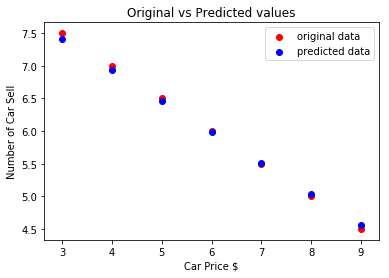

In [12]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

<a id="3"></a> <br>
### Logistic Regression
- Linear regression is not good at classification. For example, predicting whether an email is spam or not spam or whether a picture contains a cat or a dog.
- We use logistic regression for classification.
- linear regression + logistic function(softmax) = logistic regression
- Check my deep learning tutorial. There is detailed explanation of logistic regression. 
    - https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- **Steps of Logistic Regression**
    1. Import Libraries
    1. Prepare Dataset
        - We use MNIST dataset.
        - There are 28*28 images and 10 labels from 0 to 9
        - Data is not normalized so we divide each image to 255 that is basic normalization for images.
        - In order to split data, we use train_test_split method from sklearn library
        - Size of train data is 80% and size of test data is 20%.
        - Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.
        - batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
        - epoch: 1 epoch means training all samples one time.
        - In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate: 
            - training data 1 times = training 33600 sample (because data includes 33600 sample) 
            - But we split our data 336 groups(group_size = batch_size = 100) our data 
            - Therefore, 1 epoch(training data only once) takes 336 iteration
            - We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)
        - TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
        - DataLoader(): It combines dataset and sample. It also provides multi process iterators over the dataset.
        - Visualize one of the images in dataset
    1. Create Logistic Regression Model
        - Same with linear regression.
        - However as you expect, there should be logistic function in model right?
        - In pytorch, logistic function is in the loss function where we will use at next parts.
    1. Instantiate Model
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - create model
    1. Instantiate Loss 
        - Cross entropy loss
        - It calculates loss that is not surprise :)
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer 
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy(almost 85%) is increasing and our model is learning(training).    

In [13]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

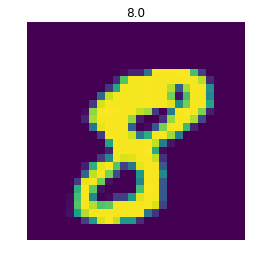

In [14]:
# Prepare Dataset
# load data
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [15]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0  # This initializes a counter to track the number of correct predictions made by the model.
            total = 0 #  This initializes a counter to track the total number of test samples processed.

            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8730406761169434  Accuracy: 65%
Iteration: 1000  Loss: 1.5988032817840576  Accuracy: 75%
Iteration: 1500  Loss: 1.3048175573349  Accuracy: 78%
Iteration: 2000  Loss: 1.2215044498443604  Accuracy: 79%
Iteration: 2500  Loss: 1.0395605564117432  Accuracy: 80%
Iteration: 3000  Loss: 0.9308297038078308  Accuracy: 81%
Iteration: 3500  Loss: 0.910397469997406  Accuracy: 82%
Iteration: 4000  Loss: 0.7655614614486694  Accuracy: 82%
Iteration: 4500  Loss: 0.9686064720153809  Accuracy: 83%
Iteration: 5000  Loss: 0.8061544299125671  Accuracy: 83%
Iteration: 5500  Loss: 0.7489278316497803  Accuracy: 84%
Iteration: 6000  Loss: 0.8792751431465149  Accuracy: 84%
Iteration: 6500  Loss: 0.670491099357605  Accuracy: 84%
Iteration: 7000  Loss: 0.7190404534339905  Accuracy: 84%
Iteration: 7500  Loss: 0.6327235698699951  Accuracy: 85%
Iteration: 8000  Loss: 0.737002968788147  Accuracy: 85%
Iteration: 8500  Loss: 0.5458570122718811  Accuracy: 85%
Iteration: 9000  Loss: 0.6634799242019

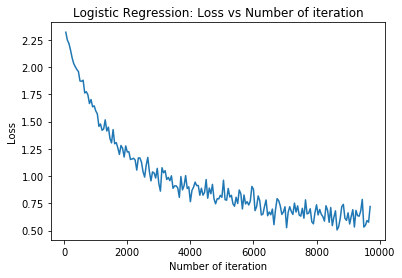

In [17]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

<a id="4"></a> <br>
### Artificial Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer. 
- I am saying again that if you do not know what is artificial neural network check my deep learning tutorial because I will not explain neural network detailed here, only explain pytorch.
- Artificial Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.
- **Steps of ANN:**
    1. Import Libraries
        - In order to show you, I import again but we actually imported them at previous parts.
    1. Prepare Dataset
        - Totally same with previous part(logistic regression).
        - We use same dataset so we only need train_loader and test_loader. 
        - We use same batch size, epoch and iteration numbers.
    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to hidden layers model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [18]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7698237895965576  Accuracy: 79 %
Iteration: 1000  Loss: 0.4648493230342865  Accuracy: 87 %
Iteration: 1500  Loss: 0.21843352913856506  Accuracy: 89 %
Iteration: 2000  Loss: 0.2975081205368042  Accuracy: 90 %
Iteration: 2500  Loss: 0.30222469568252563  Accuracy: 91 %
Iteration: 3000  Loss: 0.11832297593355179  Accuracy: 92 %
Iteration: 3500  Loss: 0.25374579429626465  Accuracy: 93 %
Iteration: 4000  Loss: 0.06288370490074158  Accuracy: 94 %
Iteration: 4500  Loss: 0.2759932279586792  Accuracy: 94 %
Iteration: 5000  Loss: 0.1143365129828453  Accuracy: 94 %
Iteration: 5500  Loss: 0.1977059245109558  Accuracy: 94 %
Iteration: 6000  Loss: 0.19960780441761017  Accuracy: 95 %
Iteration: 6500  Loss: 0.08348648995161057  Accuracy: 95 %
Iteration: 7000  Loss: 0.1128247007727623  Accuracy: 95 %
Iteration: 7500  Loss: 0.11698577553033829  Accuracy: 95 %
Iteration: 8000  Loss: 0.18491023778915405  Accuracy: 95 %
Iteration: 8500  Loss: 0.040347885340452194  Accuracy: 96 %
Iter

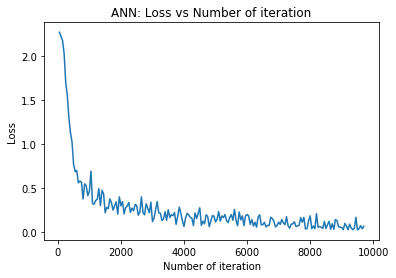

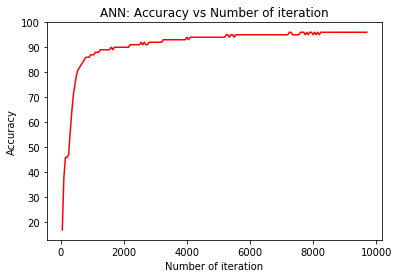

In [20]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

<a id="5"></a> <br>
### Convolutional Neural Network (CNN)
- CNN is well adapted to classify images.
- You can learn CNN basics: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
- **Steps of CNN:**
    1. Import Libraries
    1. Prepare Dataset
        - Totally same with previous parts.
        - We use same dataset so we only need train_loader and test_loader. 
    1. Convolutional layer: 
        - Create feature maps with filters(kernels).
        - Padding: After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
        - We use 2 convolutional layer.
        - Number of feature map is out_channels = 16
        - Filter(kernel) size is 5*5
    1. Pooling layer: 
        - Prepares a condensed feature map from output of convolutional layer(feature map) 
        - 2 pooling layer that we will use max pooling.
        - Pooling size is 2*2
    1. Flattening: Flats the features map
    1. Fully Connected Layer: 
        - Artificial Neural Network that we learnt at previous part.
        - Or it can be only linear like logistic regression but at the end there is always softmax function.
        - We will not use activation function in fully connected layer.
        - You can think that our fully connected layer is logistic regression.
        - We combine convolutional part and logistic regression to create our CNN model.
    1. Instantiate Model Class
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to convolutional layer, model learnt better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.   
        

In [21]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [22]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [23]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.11028283089399338  Accuracy: 96 %
Iteration: 1000  Loss: 0.044570423662662506  Accuracy: 97 %
Iteration: 1500  Loss: 0.050327710807323456  Accuracy: 97 %
Iteration: 2000  Loss: 0.016168251633644104  Accuracy: 98 %


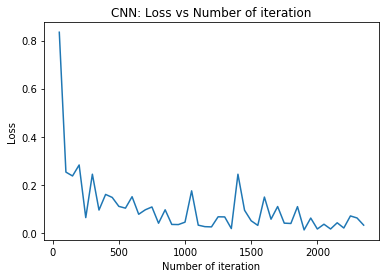

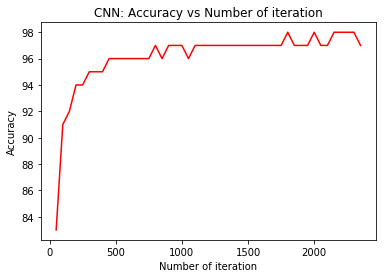

In [24]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### Conclusion
In this tutorial, we learn: 
1. Basics of pytorch
1. Linear regression with pytorch
1. Logistic regression with pytorch
1. Artificial neural network with with pytorch
1. Convolutional neural network with pytorch
1. Recurrent neural network with pytorch
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
1. Long-Short Term Memory (LSTM)
    - https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

<br> **If you have any question or suggest, I will be happy to hear it **